In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.drop("RowNumber",axis=1,inplace=True)

In [5]:
df.drop("Surname",axis=1,inplace=True)

In [6]:
df.drop("CustomerId",axis=1,inplace=True)

In [7]:
exit_tenure = df[df.Exited==1].Tenure

In [8]:
not_exited_tenure = df[df.Exited!=1].Tenure

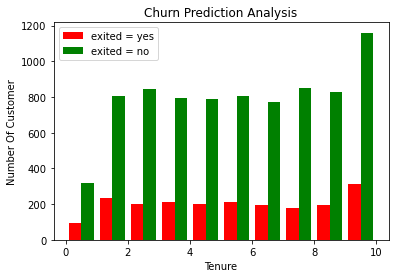

In [9]:
plt.hist([exit_tenure,not_exited_tenure],color=["red","green"],label=["exited = yes","exited = no"])
plt.title("Churn Prediction Analysis")
plt.xlabel("Tenure")
plt.ylabel("Number Of Customer")
plt.legend();

In [10]:
AnnualSalary_yes = df[df.Exited==1].EstimatedSalary
AnnualSalary_no = df[df.Exited!=1].EstimatedSalary

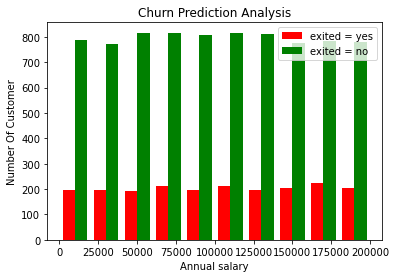

In [11]:
plt.hist([AnnualSalary_yes,AnnualSalary_no],color=["red","green"],label=["exited = yes","exited = no"])
plt.title("Churn Prediction Analysis")
plt.xlabel("Annual salary")
plt.ylabel("Number Of Customer")
plt.legend();

In [12]:
balance_yes = df[df.Exited==1].Balance
balance_no = df[df.Exited!=1].Balance

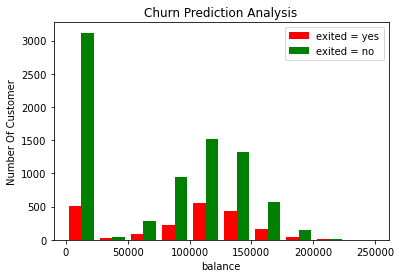

In [13]:
plt.hist([balance_yes,balance_no],color=["red","green"],label=["exited = yes","exited = no"])
plt.title("Churn Prediction Analysis")
plt.xlabel("balance")
plt.ylabel("Number Of Customer")
plt.legend();

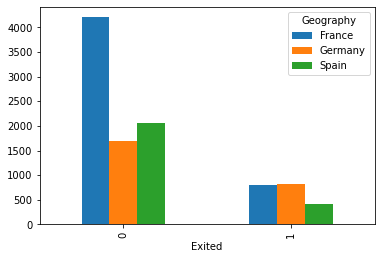

In [14]:
pd.crosstab(df.Exited,df.Geography).plot(kind="bar");

In [15]:
active_no = df[df.Exited==1].IsActiveMember
active_yes = df[df.Exited!=1].IsActiveMember

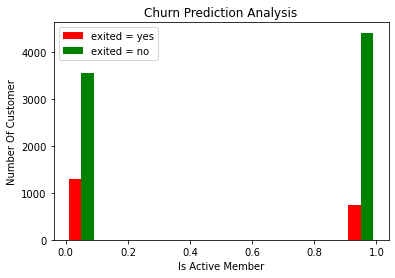

In [16]:
plt.hist([active_no,active_yes],color=["red","green"],label=["exited = yes","exited = no"])
plt.title("Churn Prediction Analysis")
plt.xlabel("Is Active Member")
plt.ylabel("Number Of Customer")
plt.legend();

not active members are little bit leaving like 1000 persons

In [17]:
#2000+ person exit,     7000+ person continuing
df[df.Exited==1].shape, df[df.Exited==0].shape

((2037, 11), (7963, 11))

In [18]:
df["Gender"].replace({'Female':1,"Male":0},inplace=True)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
col_to_scale = ["CreditScore","Tenure","Balance","EstimatedSalary"]
scale = MinMaxScaler()
df[col_to_scale] = scale.fit_transform(df[col_to_scale])

C:\Users\thesu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
df["Age"] = df["Age"]/100

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,1,0.42,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,1,0.41,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,1,0.42,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,1,0.39,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,1,0.43,0.2,0.500246,1,1,1,0.395400,0


In [23]:
col = ['Geography']
df1 = pd.get_dummies(data=df,columns=col)

In [24]:
len(df1.columns)

13

**now we done our data cleaning next we move to modelling**

In [25]:
x = df1.drop("Exited",axis=1)
y = df1["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
len(X_train.columns)

12

In [27]:
import tensorflow as tf
from tensorflow import keras


model = tf.keras.Sequential([
    tf.keras.layers.Dense(300,input_shape=(12,),activation="relu"),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.4678 - accuracy: 0.7962
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8261
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8429
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8474
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.8493
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3562 - accuracy: 0.8499
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8522
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8562
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8540
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8615

In [28]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8525


[0.3504839241504669, 0.8525000214576721]

In [29]:
y_predict = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [30]:
np.round(y_predict)

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [31]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [32]:
y_predicted = []
for i in y_predict:
    if i > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [33]:
y_predicted[:5]

[0, 0, 0, 0, 0]

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.67      0.49      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [35]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

Text(69.0, 0.5, 'Truth')

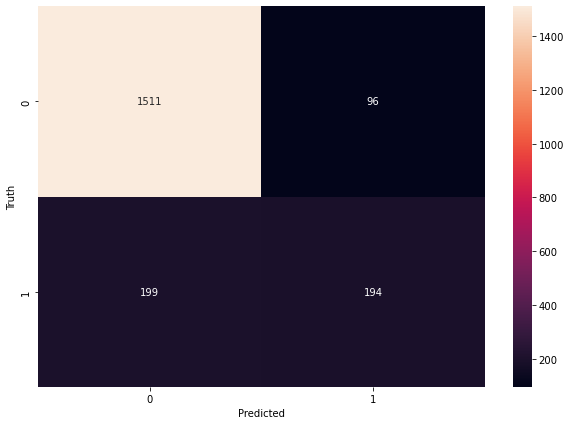

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
def model(X_train,X_test,y_train,y_test,weights):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(300,input_shape=(12,),activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(200,activation='relu'),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ])

    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    if weights == -1:
        model.fit(X_train,y_train,epochs = 100)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds
    
    
    

# Handling Imbalance data 

### Method:1  UnderSampling

In [38]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [39]:
#class count
count_class_0,count_class_1 = df1.Exited.value_counts()

#divide by class
df_0_class_org = df1[df1["Exited"]==0]
df_1_class = df1[df1["Exited"]==1]

In [40]:
df_0_class = df_0_class_org.sample(count_class_1)
df_test_under = pd.concat([df_0_class,df_1_class],axis=0)

print("Random under-sampling:")
df_test_under.Exited.value_counts()

Random under-sampling:


0    2037
1    2037
Name: Exited, dtype: int64

In [41]:
x = df_test_under.drop("Exited",axis=1)
y = df_test_under["Exited"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
len(X_train),len(X_test)

(3259, 815)

In [43]:
y_preds = model(X_train,X_test,y_train,y_test,-1)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.6509 - accuracy: 0.6112
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.6588
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.6953
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7103
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7226
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7297
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7395
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7423
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7607
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5011 - accura

### Method:2 OverSampling

In [44]:
# Oversample 1-class and concat the DataFrames of both classes
class_1_over = df_1_class.sample(count_class_0,replace=True)

df_test_over = pd.concat([df_0_class_org,class_1_over],axis=0)

In [45]:
df_test_over.Exited.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [46]:
x = df_test_over.drop("Exited",axis=1)
y = df_test_over["Exited"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
y_preds_over = model(X_train,X_test,y_train,y_test,-1)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6150 - accuracy: 0.6595
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5391 - accuracy: 0.7271
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.7476
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4981 - accuracy: 0.7525
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7578
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4857 - accuracy: 0.7601
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4838 - accuracy: 0.7649
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4813 - accuracy: 0.7635
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4753 - accuracy: 0.7665
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4736 - accura

In [49]:
x = df1.drop("Exited",axis=1)
y = df1["Exited"]

In [50]:
from imblearn.over_sampling import SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

# Now you can check the class distribution in y_sm
print(y_sm.value_counts())

1    7963
0    7963
Name: Exited, dtype: int64


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)

In [57]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [58]:
y_preds_Smote = model(x_train,x_test,y_train,y_test,-1)

Epoch 1/100
399/399 [==============================] - 3s 5ms/step - loss: 0.6167 - accuracy: 0.6632
Epoch 2/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5401 - accuracy: 0.7291
Epoch 3/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5071 - accuracy: 0.7451
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4907 - accuracy: 0.7578
Epoch 5/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4835 - accuracy: 0.7604
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4772 - accuracy: 0.7663
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4739 - accuracy: 0.7687
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4687 - accuracy: 0.7730
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4674 - accuracy: 0.7746
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4629 - accura

In [107]:
y_preds_Smote[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [76]:
y_preds_smote = [int(i[0]) for i in y_preds_Smote]

In [78]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_smote)

Text(69.0, 0.5, 'Truth')

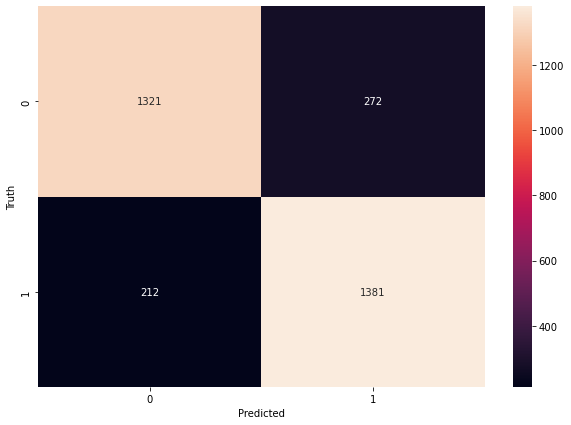

In [79]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
len(y_test),1321+1381,212+272

(3186, 2702, 484)